In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.path as plpath
import numpy as np
from numpy import linalg
import scipy
import scipy.spatial
import scipy.stats as ss
import tkinter
from scipy.spatial import ConvexHull
from scipy.spatial import distance
import random
from shapely.geometry import LineString

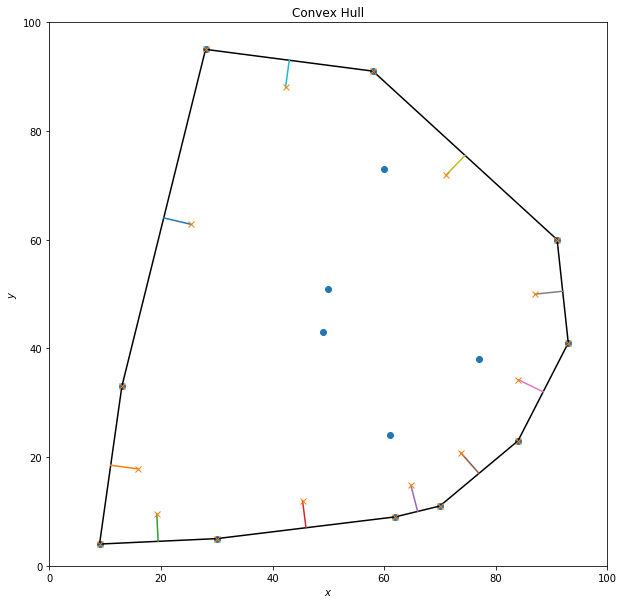

In [6]:
class elasticband:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.pts = np.column_stack((x,y))
        self.hull = ConvexHull(self.pts)
        indices = self.hull.vertices
        self.hullpts = self.pts[indices]
    def get_ptf_ind(self,indices,array):
        return array[indices]
    def find_perp(self):
        x = self.hullpts[:,0]
        x = np.append(x,x[0])
        y = self.hullpts[:,1]
        y = np.append(y,y[0])
        midx = []
        midy = []
        xnew = []
        ynew = []
        baex = []
        baey = []
        for i in range(len(x)-1):
            x1 = x[i]
            x2 = x[i+1]
            y1 = y[i]
            y2 = y[i+1]
            a = [x2-x1,y2-y1]
            a = a/np.linalg.norm(a)
            b = [a[1],-a[0]]
            m = [(x1+x2)/2,(y1+y2)/2]
            mx = (x1+x2)/2
            my = (y1+y2)/2
            x4 = mx - b[0]*5
            y4 = my - b[1]*5
            xnew.append(x1)
            xnew.append(x4)
            ynew.append(y1)
            ynew.append(y4)
            midx.append(mx)
            midy.append(my)
            baex.append(x4)
            baey.append(y4)

        self.hullpts = np.column_stack((xnew,ynew))            
        self.midpts = np.column_stack((midx,midy))
        self.baepts = np.column_stack((baex,baey))
        
        

num = 15
x = np.random.randint(1, 100, num)
y = np.random.randint(1, 100, num)
#x = [0,1,1,0]
#y = [0,0,1,5]


solution = elasticband(x,y)

solution.find_perp()
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(solution.pts[:,0], solution.pts[:,1], 'o')
plt.title('Convex Hull')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,100)
plt.ylim(0,100)
for simplex in solution.hull.simplices:
    plt.plot(solution.pts[simplex, 0], solution.pts[simplex, 1], '-k')
for i in range(len(solution.baepts)):
    plt.plot([solution.baepts[i,0],solution.midpts[i,0]],[solution.baepts[i,1],solution.midpts[i,1]])
plt.plot(solution.hullpts[:,0],solution.hullpts[:,1], 'x')
plt.show()

